# Project 2a: Alloy cluster expansions

In this project you will explore different methods for constructing an alloy cluster expansion model for the Au-Cu alloy, using various levels of physical intuition in the model construction process.
This physical intuition will be instilled through more and more complex priors, ranging from the completely uninformative prior of OLS to a full Bayesian analysis where the prior hyperparameters are sampled as well.
The different cluster expansion models are then applied to the problem of predicting the ground state structure amongst a few different candidates. 

Note that it is not required for you to understand all the details of the cluster expansion (CE) formalism to solve the project.

**You should hand in a report, via Canvas, maximum 6 pages (excluding references). 
Do not attach any appendices.
In the report you should present your data, models and the final results.
Do not forget to visualize your data and results.
It is important that you discuss your findings and reflect on the results.
In addition you need to hand in your Python code.¨
Your code should run without errors and upon inspection reproduce the main results you present in the report.
We will award extra points for code that we deem well written and structures (but we will not deduct points in the opposite case).
Emphasis will be put on your ability to use appropriate terminology to describe and discuss the employed statistical methodologies and results.
Please use the LaTeX template for reports that is provided on the homepage.**

**<font color=red>DEADLINE: Friday, Nov 25, 23:59</font>**


## Alloys
In order to study alloys on the atomic scale one can resort to density functional theory (DFT) calculations.
DFT can provide the energy of a given atomistic structure with high accuracy.
The database that we provide you with is based on DFT calculations.

The mixing energy per atom of a structure is defined as
\begin{equation}
\large
    E_\text{mix} = \frac{E_\text{structure} - n_\text{Au} E_\text{Au} - n_\text{Cu} E_\text{Cu}}{n_\text{Au} + n_\text{Cu}}
\end{equation}
where $E_\text{structure}$ is the total energy of the structure, $n_\text{Au}$ number of Au atoms in the structure and $E_\text{Au}$ the energy of pure Au.
Working with the mixing energy is often convient as it is the relevant energy when considering, e.g., phase stability of alloys.
Below a few different structures (configurations) are displayed.

<img src="images/configurations.png" alt="Drawing" style="width: 750px;"/>




## The configurational space problem
If we consider a binary system (A-B) and a lattice consisting of 100 atoms, this yields $2^{100}\approx 10^{30}$ unique ways of occupaying the lattice.
While many of the structures will be duplicates when considering translation and rotational invariance we are still left with a huge number of configurations that would need to be considered for, e.g., thermodynamic averages or ground state searches.

Calculating the energy of multiple structures with DFT is computationally very expensive and thus to solve this configurational space problem one often turns to building atomistic models based on DFT.
One of the more common atomistic models to employ is the alloy cluster expansion.


## Cluster expansions
The alloy cluster expansion is a model based on a perfect lattice.
This lattice can be occupied by various chemical species (Au and Cu in our case).
In this approach the energy of the atomic structure is modeled as a sum over the orbits times their corresponding effective cluster interaction.
In principle it looks like
\begin{equation}
\large
E_{mix} = J_0 + \sum_\alpha m_\alpha J_\alpha,
\end{equation}
where $\alpha$ refers to different orbits such as nearest neighbor pairs, next nearest neighbor pairs, triplets etc, $m_\alpha$ is the multiplicity, i.e. the number of symmetry equivalent clusters in the orbit per unit cell, and $J_\alpha$ is the corresponding effective cluster interaction (ECI).
In this project, we are not concerned with the details of decomposing a structure into orbits but simply use the [`icet` package](https://icet.materialsmodeling.org) for this purpose.

<img src="images/clusters_v1.png" alt="Drawing" style="width: 650px;"/>


Instead we focus on how to determine the unknown parameters (ECIs) for the cluster expansion model, and how to choose which type of clusters (orbits) to include in the model.
The equation above can be formulated as a dot product by defining $\boldsymbol{\xi}=[1, N_1, N_2, ...]$ and $J=[J_0, J_1, J_2, ...]$ as $E_{mix} = \boldsymbol{\xi} J$.
Here, $\boldsymbol{\xi}$ is often refered to the cluster vector of the given configuration.

If the mixing energy, $E_{mix}$, is provided, e.g., from DFT calculations, for a set of configurations, then the problem of finding the ECIs, $\boldsymbol{J}$, can be cast in the form of OLS
\begin{equation}
\large
\boldsymbol{J}_{opt} = \min_{\boldsymbol{J}} || \boldsymbol{X} \boldsymbol{J} - \boldsymbol{E_{mix}} ||_2 ^2,
\end{equation}
where $\boldsymbol{E_{mix}}$ is a vector containing the mixing energies for all structures and $\boldsymbol{X}$ a matrix where each row corresponds to a cluster vector one of the given structures.


## The linear problem
Simplest way to solve the linear problem would be to use ordinary least-squares (OLS). However, OLS tends to overfit and thus linear regression with regularization such as Ridge and LASSO are feasible alternatives.

A common issue in finding the ECIs is to select an approriate number of features (clusters) to include in the model. Features in our problem would corresponds to clusters with various interatomic distances and order. Too few can lead to underfitting and too many to overfitting. 

In this project you will construct cluster-expansion model using linear regression methods such as Lasso and ARDR. You will use cross-validation but also information criteria such as AIC and BIC in order to evaluate how many features is reasonable to include in your cluster expansion. For more information and details about these methods and metrics, see the lecture notes.

Lastly, you will see how bayesian parameter estimation of the ECIs can be used for cluster-expansion.

### Cross validation
You may freely chose a suitable cross-valdation method to use for the following tasks. K-fold is commonly used and available through `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Ten folds might be a good starting point to try out.

### Information criteria
The Bayesian information criteria (BIC) is defined as
\begin{equation}
\text{BIC} = 2 log(L_*) - N_p log(N_d)
\end{equation}
where $L_*$ is the maximized likelihood, $N_p$ the number of parameters, and $N_d$ number of data points.     
The energies (or data) can be modeled through
Here we assume the errors, $\epsilon$, are normal distributed with zero mean and variance $\sigma^2$.
\begin{equation}
\boldsymbol{E} = \boldsymbol{\xi} \boldsymbol{J} + \epsilon , \quad \epsilon \sim \mathcal{N}(\mu=0, \sigma^2) \\
\end{equation}
Therefore the likelihood, $P(D|\boldsymbol{J}, \sigma)$, can be defined as
\begin{equation}
L = P(D|\boldsymbol{J}, \sigma) = \frac{1}{(2\pi \sigma^2)^{N_d/2}}\exp{(-||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2 / 2\sigma^2)}
\end{equation}
The ECIs, $\boldsymbol{J}$, you will obtain from linear regression algorithms (LASSO, etc), and $\sigma$ can be found from setting $\frac{\mathrm{d} L }{\mathrm{d} \sigma} = 0$. This is left as an exercise to the reader but final expression for BIC becomes
\begin{equation}
\text{BIC} = -N_d log(\text{MSE}) - N_p log(N_d) + \text{const}
\end{equation}
where the constant term, $\text{const}$, is irrelevant and $\text{MSE}$ is the mean squared error, defined as 
\begin{equation}
\text{MSE} = \frac{1}{N_d}||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2
\end{equation}

### sklearn
Regression algorithms like OLS, Ridge, ARDR (and many more) are available in `sklearn`. One can also use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from `sklearn` to standardize data. 

*Note: Since we're including the constant term in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

## Additional information
For more information, see the lecture notes as well as the demos. 
For Task 3, a similar analysis is performed in the notebook `ce-with-covariance-matrix.ipynb`.

Additional information in regards to cluster expansions and how these can be trained and used can be found in the  following papers:

* Robust data-driven approach for predicting the configurational energy of high entropy alloys (doi.org/10.1016/j.matdes.2019.108247)
* [`icet`](https://icet.materialsmodeling.org) – A Python Library for Constructing and Sampling Alloy Cluster Expansions (doi.org/10.1002/adts.201900015)
* Covariance regularization by Mueller et al. [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103)

In this project, you are provided with data in the form of [ASE databases](https://wiki.fysik.dtu.dk/ase/ase/db/db.html). Please see the notebook `introduction-to-cluster-expansions.ipynb` for further details on how to read such databases and tips on working with cluster expansions in general. 

## Setup

In [1]:
import ase
import icet
from ase.db import connect
from icet import ClusterSpace, StructureContainer, ClusterExpansion
from trainstation import CrossValidationEstimator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set_context('notebook')
import sklearn.preprocessing as skpp
from sklearn.linear_model import RidgeCV
import sklearn.linear_model
import sklearn.model_selection
import matplotlib
font = {'size'   : 14}

matplotlib.rc('font', **font)

## Task 1: Prepare data (1.5p)

The data can be found in the ASE database `AuCu-structures.db`.
Here each row corresponds to an atomic structure with an attached mixing energy in units of eV per atom.
Use fixed cutoff radii of 8 Å, 6 Å, and 5 Å for pairs, triplets, and quadruplets.

**Task:** 
* Read the database and collect the atomic structures and energies.
* Plot the mixing energy as a function of Cu concentration
* Standardize the mixing energy $E$ and the cluster vectors $X$. 

**Discuss:**
* Why is it good practice to standardize the data? Is it necessary in this case?

In [2]:
db = ase.db.connect("AuCu-structures.db")
prim = db.get(formula='Cu').toatoms()
cs = icet.ClusterSpace(prim, cutoffs=[8, 6, 5], chemical_symbols=['Au', 'Cu'])
#print(cs)

db = connect('AuCu-structures.db')
sc = StructureContainer(cs)
for row in db.select():
    sc.add_structure(row.toatoms(), properties=dict(mixing_energy=row.mixing_energy))
#print(sc)
sc.get_fit_data(key='mixing_energy')
X, E = sc.get_fit_data(key='mixing_energy')
J = np.dot(scipy.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, E))
ce = ClusterExpansion(parameters=J, cluster_space=cs)
print(ce)

================================================ Cluster Expansion ================================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Au', 'Cu'] (sublattice A)
 cutoffs                                : 8.0000 6.0000 5.0000
 total number of parameters             : 24
 number of parameters by order          : 0= 1  1= 1  2= 7  3= 12  4= 3
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
 total number of nonzero parameters     : 24
 number of nonzero parameters by order  : 0= 1  1= 1  2= 7  3= 12  4= 3 
-------------------------------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multicomponent_vector | sublattices | parameter |    ECI   
--------------------------------------------------------------------------------------

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.         -1.          1.         ...  1.          1.
   1.        ]
 [ 1.          0.          0.         ... -1.          0.
   1.        ]
 ...
 [ 1.          0.2        -0.2        ...  0.2         0.06666667
  -0.06666667]
 [ 1.         -0.2        -0.2        ...  0.2         0.06666667
  -0.06666667]
 [ 1.         -0.6         0.2        ... -0.6        -0.33333333
  -0.06666667]]


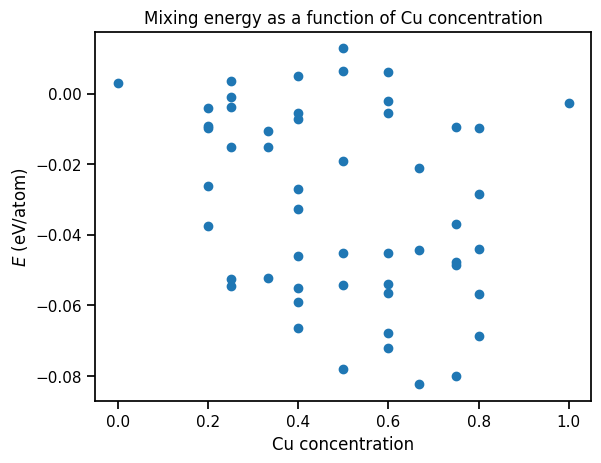

(52, 24)
(52, 1)


In [3]:
concentration_Cu = np.empty(len(db))
#mixing_energy = np.empty(len(db))
for i,row in enumerate(db.select()):
    #print(row.key_value_pairs)
    count_atoms = row.count_atoms()
    #print(row.count_atoms())
    if 'Cu' in count_atoms.keys() and 'Au' in count_atoms.keys():
        concentration_Cu[i] = count_atoms['Cu']/(count_atoms['Cu']+count_atoms['Au'])
    elif 'Cu' in count_atoms.keys():
        concentration_Cu[i] = 1
    else:
        concentration_Cu[i] = 0
    #concentration_Cu[i] = row.get.concentration_Cu
    #mixing_energy[i] = row.mixing_energy
#print(mixing_energy)

sc = icet.StructureContainer(cs)
for row in db.select():
    sc.add_structure(row.toatoms(), properties=dict(mixing_energy=row.mixing_energy))
#print(sc)
X,E = sc.get_fit_data(key='mixing_energy')
print(X)
E = E.reshape(-1,1)
#X = np.transpose(X)
plt.figure(1)
plt.scatter(concentration_Cu, E)
plt.title("Mixing energy as a function of Cu concentration")
plt.ylabel("$E$ (eV/atom)")
plt.xlabel("Cu concentration")
plt.show()
#Standardize the mixing energy and cluster vectors
scaler_X = skpp.StandardScaler()
scaler_E = skpp.StandardScaler()
scaler_X.fit(X)
scaler_E.fit(E)
X = scaler_X.transform(X)
print(X.shape)
E = scaler_E.transform(E)
print(E.shape)
#X = X.transpose()

## Task 2: OLS and ridge regression (2p)

Use OLS and ridge to fit the ECIs. You may use routines from, e.g., scikit-learn.

Ridge regression uses a hyperparameter $\alpha$ to penalize large values for the ECIs, by using the following loss function: 

$$ 
L = ||E - XJ||^2 + \alpha ||J||^2
$$

where $E$ is the mixing energy and $x$ the design matrix of cluster vectors and $J$ the ECIs. The solution $J_{opt}$ that minimizes $L$  can then be written as:

$$ 
J_{opt, Ridge} = (X^T X + \alpha I)^{-1} X^T E
$$

**Tasks**
* Fit ECIs using OLS and ridge regression
    * Use k-fold cross validation to find a good value for $\alpha$. 
* Compare the CV-RMSE and size of the ECIs between OLS and Ridge

**Discuss**
* What are the qualitative differences between OLS and Ridge?

*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

In [4]:
from sklearn.model_selection import cross_val_score

Size of OLS ECIs: 1.2454962203888136
OLS CV-RMSE: 0.1482622003566684
Size of Ridge ECIs: 1.2209086331882666
Ridge CV-RMSE: 0.14631235553208932


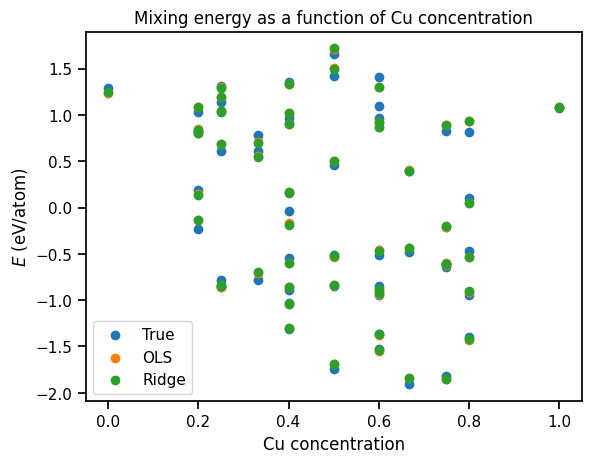

In [5]:
OLS = sklearn.linear_model.LinearRegression(fit_intercept=False)
OLS.fit(X,E)
ols_coefs = OLS.coef_
ols_eci_size = np.linalg.norm(ols_coefs) # Should probably check each coefficient individually, and not like this.
print(f"Size of OLS ECIs: {ols_eci_size}")

ols_cv_scores = cross_val_score(OLS, X, E, cv=10, scoring='neg_mean_squared_error')
ols_cv_rmse = np.sqrt(-np.mean(ols_cv_scores))
print(f"OLS CV-RMSE: {ols_cv_rmse}")

Ridge = sklearn.linear_model.Ridge(alpha = 0.1, fit_intercept=False)
ret = sklearn.model_selection.cross_validate(Ridge, X, E, cv = 10)
#print(ret['test_score'])
Ridge.fit(X,E)
ridge_coefs = Ridge.coef_
ridge_eci_size = np.linalg.norm(ridge_coefs)
print(f"Size of Ridge ECIs: {ridge_eci_size}")

ridge_cv_scores = cross_val_score(Ridge, X, E, cv=10, scoring='neg_mean_squared_error')
ridge_cv_rmse = np.sqrt(-np.mean(ridge_cv_scores))
print(f"Ridge CV-RMSE: {ridge_cv_rmse}")

#print(ols_coefs)
#print(ridge_coefs)
plt.figure(1)
plt.scatter(concentration_Cu, E, label = "True")
plt.scatter(concentration_Cu, np.dot(X,ols_coefs.reshape(-1,1)), label = "OLS")
plt.scatter(concentration_Cu, np.dot(X,ridge_coefs.reshape(-1,1)), label = "Ridge")
plt.title("Mixing energy as a function of Cu concentration")
plt.ylabel("$E$ (eV/atom)")
plt.xlabel("Cu concentration")
plt.legend()
plt.show()

## Task 3: Covariance matrix for cluster similarity (4p)

Ridge regression regularizes parameters by using the $\alpha$ to penalize larger absolute values of the ECIs. This is a very general approach that works for a broad range of problems, and can be motivated by physical intuition in that smaller parameter values are favored. However, we can improve upon Ridge regression by creating more elaborate regularization schemes that inlcude physical intuition about our specific system. 

One example of such physical intuition is that we expect cluster orbits with more sites and with a larger distance between them to contribute less to the overall energy of the structure than smaller/more compact clusters. In other words, we expect that the ECIs decrease with the number of sites and the size of a orbit. Following the approach outlined Mueller et al. in [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103), this can be achieved by modifying the Ridge least-squares estimator as follows: 

$$
J_{opt, Cov} = (X^T X + \Lambda)^{-1} X^T E.
$$

Here, $\Lambda$ is known as the *regularization matrix*. Using this regularization matrix is the same as using the following prior over the ECIs

$$
P(J|X) \propto e^{-J^T \Lambda J /2}.
$$

This is a multivariate normal distribution over the components of $J$ with covariance $\Lambda^{-1}$, and hence we can interpret $\Lambda$ to be the inverse of the covariance matrix for the prior distribution  of $J$. By modifying $\Lambda$, we can thus encode physical intuition similarly to how we usually specify priors in a fully Bayesian approach. 

The elements of $\Lambda$ are given by
$$
\Lambda_{\alpha,\alpha} = \frac{\sigma^2}{\sigma_\alpha^2} + \sum_{\beta | \beta\neq\alpha} \frac{\sigma^2}{\sigma_{\alpha\beta}}\\
\Lambda_{\alpha\beta} = \Lambda_{\beta\alpha} = - \frac{\sigma^2}{\sigma_{\alpha\beta}^2}.
$$

It is useful to consider the extremal cases for the elements of $\Lambda$, using the reduced values $\lambda_{\alpha}=\sigma^2/\sigma_\alpha^2$ and  $\lambda_{\alpha\beta}=\sigma^2/\sigma_{\alpha\beta}^2$.

1. $\lambda_{\alpha} \rightarrow \infty$: force ECI for orbit $\alpha$ to zero (= remove orbit)
1. $\lambda_{\alpha} \rightarrow 0$ and $\lambda_{\alpha\beta} \rightarrow 0$: all ECIs/orbits are equally likely; this recovers OLS
1. $\lambda_{\alpha\beta} \rightarrow 0$: no correlation (coupling) between orbits; this recovers ridge regression if $\lambda_\alpha$ is the same for all orbits
1. $\lambda_{\alpha\beta} \rightarrow \infty$: force two orbits to have the same ECI

In this project we will only focus on the diagonal elements $\lambda_\alpha$, and set the off-diagonal elements $\lambda_{\alpha\beta}=0$. We will thus not merge any cluster orbits. Merging cluster orbits has the benefit of constraining the parameter space, simplifying optimization procedure. See the demo `cluster-expansion-construction` for details.

We can thus encode our prior information/physical intuition that orbits with more sites/larger size should have smaller ECIs by modifying the parameters $\lambda_\alpha$. To demonstrate this approach, we calculate $\lambda_\alpha$ according to the following (linear) regularization scheme

$$ 
\lambda_\alpha(n,r, \gamma) = \gamma_1r+\gamma_2n, 
$$

where $n$ and $r$ is the number of sites and radius of orbit $\alpha$ respectively. $\lambda_\alpha$ grows with larger $n$ and $r$, decreasing the size of that ECI. The problem is now reduced to finding the two optimal hyperparameters $\gamma$, instead of finding all the $\lambda_\alpha$ individually.

**Tasks:**
* Find the hyperparameters $\gamma$ that minimizes the CV-RMSE of the model with $J_{opt, Cov}$.
* Compare the CV-RMSE and the ECIs to OLS and Ridge from Task 2. 

**Discuss:**
* What is the interpretation of having an individual parameter $\lambda_\alpha$ for each orbit? How does this compare to Ridge regression?
* How does the CV-RMSE and the ECIs compare to OLS and Ridge? Can you explain it? 

*Hints*
* You can use, e.g., [`scipy.minimize.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to optimize the hyperparameters $\gamma$. 

In [6]:
df = ce.to_dataframe()

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from scipy.optimize import minimize

In [8]:
def phys(gamma, X, E, r_array, n_array):
    kf = KFold(n_splits=10)
    rmse_scores = []

    # Compute Lambda using training data
    lambda_alpha = gamma[0] * r_array + gamma[1] * n_array
    Lambda = np.diag(lambda_alpha)

    for train_index, test_index in kf.split(X):
        # Splitting data into training and test sets
        X_train, X_test = X[train_index], X[test_index]
        E_train, E_test = E[train_index], E[test_index]

        # Train model on training data
        J = np.linalg.inv(X_train.T @ X_train + Lambda) @ X_train.T @ E_train

        # Make predictions on test data
        pred_E_test = X_test @ J

        # Calculate and store RMSE for this fold
        mse = np.mean((E_test - pred_E_test) ** 2)
        rmse_scores.append(np.sqrt(mse))

    # Average RMSE across all folds
    avg_rmse = np.mean(rmse_scores)
    return avg_rmse

In [9]:
# no CV.
def func(gamma, X, E, r_array, n_array):
    lambda_alpha = gamma[0] * r_array + gamma[1] * n_array
    Lambda = np.diag(lambda_alpha)
    J = np.linalg.inv(X.T @ X + Lambda) @ X.T @ E
    pred_E = X @ J
    mse = np.mean((E - pred_E)**2)
    rmse = np.sqrt(mse)
    return rmse

In [10]:
initial_gamma = [0.27, -0.07]
n_array = df.order.to_numpy()
r_array = df.radius.to_numpy()
print(X)
X[:, 0] = 1 # What he said in last lab session? Prevents singular matrix.

[[ 0.          2.28568082  2.73935501 ...  1.38884843  2.71675831
   1.32794086]
 [ 0.         -2.34805807  2.73935501 ...  1.38884843  2.71675831
   1.32794086]
 [ 0.         -0.03118863 -0.79822265 ... -1.85457006 -0.27487202
   1.32794086]
 ...
 [ 0.          0.43218526 -1.50573819 ...  0.09148103 -0.07543
  -0.92072969]
 [ 0.         -0.49456252 -1.50573819 ...  0.09148103 -0.07543
  -0.92072969]
 [ 0.         -1.42131029 -0.09070712 ... -1.20588636 -1.27208213
  -0.92072969]]


In [11]:
# Just some testing
gamma = [1, 1]
lambda_alpha = gamma[0] * r_array + gamma[1] * n_array
Lambda = np.diag(lambda_alpha)

In [12]:
result = minimize(phys, initial_gamma, args=(X, E, r_array, n_array))
gamma_opt = result.x
print(gamma_opt)

[ 0.27256144 -0.07481638]


In [13]:
phys(gamma_opt, X, E, r_array, n_array)

0.10591519038081978

## Task 4: Bayesian Cluster expansion (4.5p)


A full Bayesian analysis includes the hyperparameters for the prior distribution as parameters to be optimized, which means that they are also sampled and optimized in conjunction with the model parameters. This can be compared to the Covariance approach in Task 3, which finds a single optimal prior distribution. 

In this task, you will perform a full Bayesian analysis for the ECIs.

### Priors
For this problem you can use a gaussian prior for the ECIs with a zero mean and variance $\alpha ^2$. This can be defined as
\begin{equation}
P(\boldsymbol{J}) = \frac{1}{(2\pi \alpha^2)^{N_p/2}}\exp{(-||\boldsymbol{J}||^2 / 2\alpha^2)}
\end{equation}
where $N_p$ is the number of ECIs (length of vector $\boldsymbol{J}$).
For the priors over $\sigma$ and $\alpha$ you can for example use inverse gamma distributions. The total prior $P(\boldsymbol{J}, \sigma, \alpha)$  is then given by the product of all priors.

### Posterior
In this task you will generate cluster expansion models from the posterior probability distribution $P(\boldsymbol{J}|D)$, where $D$ is the training data (cluster-vectors and energies). The posterior is defined as
\begin{equation}
\underbrace{P(\boldsymbol{J}, \sigma^2, \alpha|D)}_\text{posterior} = \underbrace{P(D|\boldsymbol{J}, \sigma)}_\text{likelihood} \underbrace{P(\boldsymbol{J}, \sigma, \alpha)}_\text{prior}/P(D)
\end{equation}


**Tasks:**
* Define the (log) liklihood, (log) prior and (log) posterior functions.
* Sample the posterior distribution using MCMC and generate about 100-1000 (uncorrelated) samples (models).
* Visualize the ECIs for a MCMC chain.

**Discuss:**
* How many parameters seems "necessary" (non-zero) according to your MCMC sampling?
* What would happen if you had set your priors to something "unphysical", for instance to favor 3rd and 4th order clusters very highly?

*Hints:*
* `emcee` can be used for the MCMC sampling
* You may need to use a long burn-in period
* From previous tasks we know and $\sigma$ to be in the range 0.02-2 and $\alpha$ to be in the range 0.05-0.5.

**If you are using `emcee` for the MCMC sampling, please use the following code snippet when defining the sampler.**
This uses the `HDF` backend, which saves the sampling chain to a `.h5`-file instead of keeping it in memory. 
This is especially important if you are using the JupyterHub server, as otherwise the memory may fill up, decreasing the performance for everyone using the server. 

In [14]:
from scipy.stats import invgamma
import emcee
import corner

In [15]:
def log_J_prior(param):
    J = param[:24]
    Np = len(J)
    alpha = param[24]
    if alpha <= 0:
        return -np.inf
    return -0.5 / alpha**2 * np.sum(J**2) - 0.5 * Np * np.log(2 * np.pi * alpha**2)

def log_alpha_prior(param):
    alpha = param[24]
    if alpha <= 0:
        return -np.inf
    return invgamma.logpdf(alpha, a=0.5,scale=5)

def log_sig2_prior(param):
    sig = param[25]
    if sig <= 0:
        return -np.inf
    return invgamma.logpdf(sig, a=1.5, scale=5)

def log_likelihood(param, E, X):
    J = param[:24]
    alpha = param[24]
    sig = param[25]
    if sig <= 0:
        return -np.inf
    Nd = len(E)
    log_likelihood = -0.5 * np.sum(E - X @ J)**2 / sig**2 - 0.5 * Nd * np.log(2 * np.pi * sig**2)
    return log_likelihood

def log_posterior(param, E, X):
    return log_likelihood(param, E, X) + log_J_prior(param) + log_alpha_prior(param) + log_sig2_prior(param)

In [16]:
def simple_mcmc_analysis(sampler, par, burn_in):

    print(f'Mean acceptance fraction: {np.mean(sampler.acceptance_fraction):0.3f}')
    # discard the first 'burn_in' samples 
    
    # thinning means that you only keep every nth sample. E.g. thinning=10 -> keep every 10th sample.
    # This can be useful for reducing long autocorrelation lenghts in a chain. However, thinning is expensive.
    # A thinned chain must be run E.g. 10x longer to reach the desired number of samples.
    # One can argue that thinning is not an advantageous strategy. So keep thinning = 1
    thinning = 1
    flat_mcmc_samples = sampler.get_chain(discard=burn_in,thin=thinning, flat=True)
    print(f'Discarding {nwalkers*burn_in} steps as burn-in')
    print(f'Chain length:{len(flat_mcmc_samples)}')

    fig1 = plt.figure();
    plt.plot(flat_mcmc_samples[:,par],color='gray',alpha=0.7)
    plt.xlabel('Sample');
    plt.ylabel('param')
    plt.xlim(0,len(flat_mcmc_samples));

    return flat_mcmc_samples

In [17]:
ndim = 24 + 2 # J + alpha + sigma
nwalkers = 52

initial_J = np.zeros(24)
print(initial_J)
initial_alpha = 0.3
initial_sig = 1

start_pos = np.zeros((nwalkers, ndim))

# Set initial positions for each walker
for i in range(nwalkers):
    start_pos[i, :24] = initial_J + 1 * np.random.randn(24)  # Perturbed J for each walker
    start_pos[i, 24] = initial_alpha + 0.01 * np.random.randn()  # Perturbed alpha
    start_pos[i, 25] = initial_sig + 0.01 * np.random.randn()  # Perturbed sig2

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(E, X))
sampler.run_mcmc(start_pos, 1000, progress=True)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


100%|█| 1000/1000 [00:06<00:00, 164.14i


State([[ 2.80979468e-04  6.39690223e-01  1.20746953e-01 ... -1.55868100e-01
   3.53285648e-01  9.99939601e-01]
 [ 1.07780103e-04  4.17488097e-01  3.07336899e-02 ...  4.03224249e-02
   2.98923203e-01  9.89541772e-01]
 [-5.04170832e-05  4.30696952e-01 -4.49308545e-01 ...  4.82380345e-01
   3.09963755e-01  1.00116614e+00]
 ...
 [ 1.50901146e-04 -1.45414316e-01  3.67546098e-01 ...  3.00798956e-01
   3.08389661e-01  1.00235614e+00]
 [-2.52401564e-04 -7.15780184e-02 -1.80395553e-01 ... -1.79425557e-01
   2.96305872e-01  9.54820022e-01]
 [-2.30340016e-04  4.91592652e-01 -2.16525862e-01 ...  2.54839801e-01
   3.04944384e-01  9.93997713e-01]], log_prob=[-74.50242781 -64.17364359 -71.32892952 -67.55099128 -73.1838062
 -68.97378224 -66.77831792 -74.99258999 -68.33846896 -71.25733198
 -74.7197764  -71.38293166 -74.75426402 -73.67692011 -70.3812844
 -78.26353765 -66.72004057 -65.37974562 -73.32659842 -80.57463196
 -73.40154556 -65.58025914 -68.13143816 -69.44824109 -75.6700604
 -78.04570868 -68.817

Mean acceptance fraction: 0.270
Discarding 0 steps as burn-in
Chain length:52000


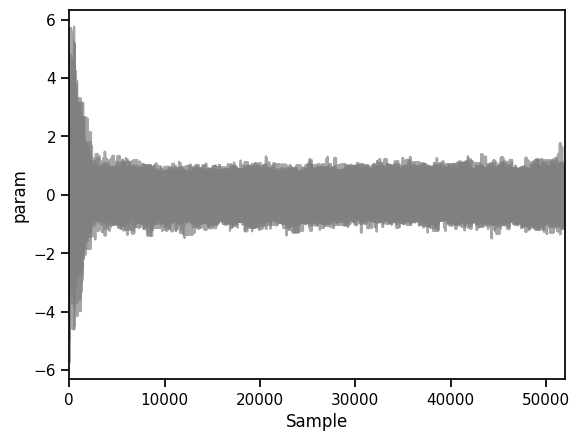

In [18]:
flat_mcmc_samples = simple_mcmc_analysis(sampler, par = list(range(1, 24)), burn_in=0)
# todo: Need to make this fig look better. But looks convergent?

#flat_mcmc_samples = sampler.get_chain(discard=100,thin=1, flat=True)
#print(flat_mcmc_samples.shape)
#fig = corner.corner(flat_mcmc_samples, show_titles=True, bins=20)
#plt.savefig('corner_plot.png')

## Task 5: ARDR Feature selection (4p)

The techniques previously studied (Task 2-4) have been rather hands-on in that the user has quite a lot of control over how the parameter priors are constructed and optimized. Automatic Relevance Detection Regression (ARDR) on the other hand offers an automatic approach to optimizing the shape of the parameter priors, through several different shape parameters. In this task you will investigate how ARDR performs while varying a single shape parameter known as `threshold_lambda` in the [scikit-documentation for ARDR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html).  


Scan a range of values for the hyper-parameter and evaluate CV-error and IC to determine a good value for the hyper-parameters. Records also how many nonzero parameters you obtained.

To demonstrate the power of ARDR, increase the cutoffs in the cluster space to `[13,8,6]`, which greatly increases the number of parameters and makes the problem very overdetermined. 

**Tasks:**
* Compute the training and CV error for a range of values for `threshold_lambda`.
* Visualize the training error and CV-error as well as the AIC/BIC as function of number of non-zero parameters in the model.   

**Discuss:**
* How many features you think is suitable to include in a final model based on your analysis.
* Which ECIs are selected here? Is there a difference to OLS/Ridge/Covariance approach?

In [19]:
# Probably unnecessarily much. Just a repeat of the code above, except cutoff values.
db = ase.db.connect("AuCu-structures.db")
prim = db.get(formula='Cu').toatoms()
cs = icet.ClusterSpace(prim, cutoffs=[13, 8, 6], chemical_symbols=['Au', 'Cu'])
print(cs)

db = connect('AuCu-structures.db')
sc = StructureContainer(cs)
for row in db.select():
    sc.add_structure(row.toatoms(), properties=dict(mixing_energy=row.mixing_energy))
#print(sc)
sc.get_fit_data(key='mixing_energy')
X_c, E_c = sc.get_fit_data(key='mixing_energy')
J_c = np.dot(scipy.linalg.pinv(np.dot(X_c.T, X_c)), np.dot(X_c.T, E_c))

concentration_Cu = np.empty(len(db))
#mixing_energy = np.empty(len(db))
for i,row in enumerate(db.select()):
    #print(row.key_value_pairs)
    count_atoms = row.count_atoms()
    #print(row.count_atoms())
    if 'Cu' in count_atoms.keys() and 'Au' in count_atoms.keys():
        concentration_Cu[i] = count_atoms['Cu']/(count_atoms['Cu']+count_atoms['Au'])
    elif 'Cu' in count_atoms.keys():
        concentration_Cu[i] = 1
    else:
        concentration_Cu[i] = 0

sc = icet.StructureContainer(cs)
for row in db.select():
    sc.add_structure(row.toatoms(), properties=dict(mixing_energy=row.mixing_energy))
#print(sc)
X_c,E_c = sc.get_fit_data(key='mixing_energy')
E_c = E_c.reshape(-1,1)

#Standardize the mixing energy and cluster vectors
scaler_X_c = skpp.StandardScaler()
scaler_E_c = skpp.StandardScaler()
scaler_X_c.fit(X_c)
scaler_E_c.fit(E_c)
X_c = scaler_X_c.transform(X_c)
E_c = scaler_E_c.transform(E_c)
E_cc = E_c
E_c = E_c.ravel()
#X = X.transpose()

====================================== Cluster Space ======================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Au', 'Cu'] (sublattice A)
 cutoffs                                : 13.0000 8.0000 6.0000
 total number of parameters             : 104
 number of parameters by order          : 0= 1  1= 1  2= 24  3= 43  4= 35
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
-------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multicomponent_vector | sublattices
-------------------------------------------------------------------------------------------
   0  |   0   |   0.0000 |        1     |      -1     |           .           |      .     
   1  |   1   |   0.0000 |        1     |       0     |          [0]          |      A  

In [31]:
pts = 50
threshold_lambda_values = np.linspace(0, 100000, pts) # Set to atleast 10 pts, but more is probably better.
# needs more thorough testing, 10 points takes about 20 minutes on apple M2 chip.
# Png figs for 10 pts are in the repo.
cv_errors = np.zeros(pts)
training_errors = np.zeros(pts)
non_zero_params = []
aics = np.zeros(pts)
bics = np.zeros(pts)

# See AIC Wikipedia-article for explanation of formulas (or above...)
def calculate_aic(n, rss, k):
    return -(n * np.log(rss / n) + 2 * k)

def calculate_bic(n, rss, k):
    return -(n * np.log(rss / n) + k * np.log(n))

for i, threshold_lambda in enumerate(threshold_lambda_values): # long runtime. see above.
    print(i)
    ARD = sklearn.linear_model.ARDRegression(threshold_lambda=threshold_lambda)
    ARD.fit(X_c, E_c)
    
    # Cross-Validation error
    cv_error = -np.mean(cross_val_score(ARD, X_c, E_c, cv=10, scoring='neg_mean_squared_error'))
    cv_errors[i] = cv_error

    residuals = ARD.predict(X_c) - E_c
    
    # Training error
    training_error = np.mean(residuals ** 2)
    training_errors[i] = training_error
    
    # Number of non-zero parameters
    k = np.sum(ARD.coef_ != 0)
    non_zero_params.append(k)

    # AICs and BICs
    Nd = len(E)
    rss = np.sum(residuals ** 2)
    aic = calculate_aic(Nd, rss, k)
    aics[i] = aic
    bic = calculate_bic(Nd, rss, k)
    bics[i] = bic

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [71]:
optim_lambda = threshold_lambda_values[np.argmax(aics)] #18367.34693877551
print(optim_lambda)
ARD = sklearn.linear_model.ARDRegression(threshold_lambda=optim_lambda)
ARD.fit(X_c, E_c)
ARD_coefs = ARD.coef_

18367.34693877551


In [72]:
ARD_eci_size = np.linalg.norm(ARD_coefs) # Should probably check each coefficient individually, and not like this.
print(f"Size of ARD ECIs: {ARD_eci_size}")

ARD_cv_scores = cross_val_score(ARD, X_c, E_c, cv=10, scoring='neg_mean_squared_error')
ARD_cv_rmse = np.sqrt(-np.mean(ARD_cv_scores))
print(f"ARD CV-RMSE: {ARD_cv_rmse}")

print(ARD_coefs)

Size of ARD ECIs: 1.1699720924814898
ARD CV-RMSE: 0.20261538394642123
[ 0.00000000e+00  5.75526997e-01  6.89266623e-01 -3.06269431e-01
  0.00000000e+00  1.22550628e-01  1.86155232e-01 -4.76132697e-01
 -6.03608198e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.51561292e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.91252947e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.90982518e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.80155467e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.

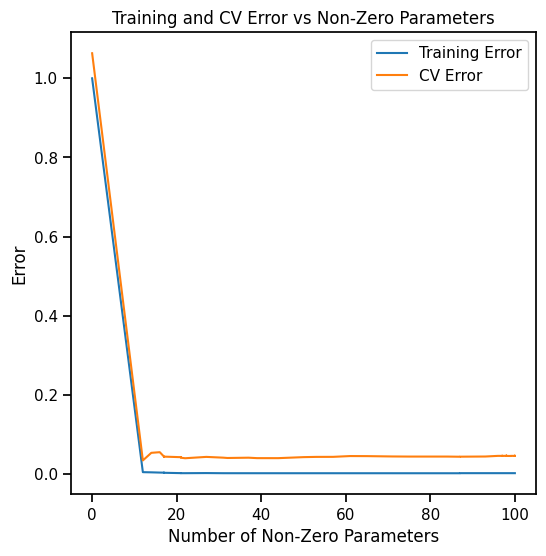

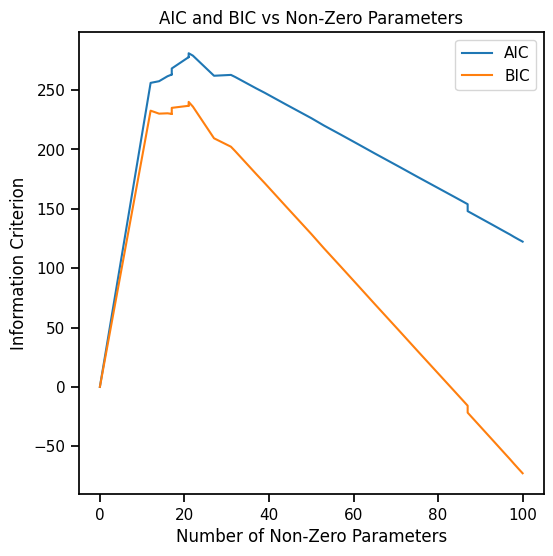

In [35]:
# Generates empty pictures, because we need to specify more points. See above cell.
plt.figure(figsize=(6, 6))
plt.plot(non_zero_params, training_errors, label='Training Error')
plt.plot(non_zero_params, cv_errors, label='CV Error')
plt.xlabel('Number of Non-Zero Parameters')
plt.ylabel('Error')
plt.title('Training and CV Error vs Non-Zero Parameters')
plt.legend()
#plt.savefig('training_cv_error.png')
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(non_zero_params, aics, label='AIC')
plt.plot(non_zero_params, bics, label='BIC')
plt.xlabel('Number of Non-Zero Parameters')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC vs Non-Zero Parameters')
plt.legend()
#plt.savefig('aic_bic.png')
plt.show()

## Task 6: The ground state (3p)

In this final task, you will compare all the earlier techniques (Tasks 2-5) in predicting the ground state of candidate clusters.The ground-state structure refers to the structure with the lowest energy for a given concentration. Macroscopic properties like thermal conductivity, heat-capacity etc can depend strongly on the particular ground-state configuration and it is therefore important to know the correct ground-state structure.

In the database `ground_states_candidates.db` you will find potential ground-state candidates for $c_{Cu}=0.667$. In this task you will assign each ground-state candidate in the database an estimated energy, and use your results from task 4 to estimate the probability of each candidate being the actual ground-state.

**Tasks:**
* Use the models that you've studied in Tasks 2-5 to predict the ground state structure and energy.
    * From Task 2, use OLS and the RIDGE model with optimal hyperparameter that you found. 
    * From Task 3, use the optimal Covariance model that you found.
    * From Task 4, use the cluster-expansions samples (from MCMC) and compute the frequency of each candidate structure being the ground-state.
        * Also plot the disitrubtion of the ground-state energy.
    * From Task 5, use the ARDR model with the optimal hyperparameter that you found.
* Compare the results from predicting the ground state with Task 2-5 and discuss the results. 

**Discuss:**
* Can you spot any differences between the models in predicting the ground state? Why/why not?
* Which model approach do you think is the most suitable for this problem? (No right or wrong answer here; it's the discussion that's important)
    * In particular elaborate on the differences between automatic feature selection (such as Ridge/ARDR) and more hands-on, physical intuition based approaches (such as Covariance/Full Bayesian).

*Hints*
* Remember that the ECIs have previously been normalized. You will thus have to normalize the ground state candidate cluster vectors and transform the predicted energies back to the original energy scale. 

['Au']
['Cu']
['Au', 'Cu']
['Au', 'Cu']
['Au', 'Au', 'Cu']
['Au', 'Cu', 'Cu']
['Au', 'Au', 'Cu']
['Au', 'Cu', 'Cu']
['Au', 'Au', 'Cu']
['Au', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Cu']
['Au', 'Au', 'Cu', 'Cu']
['Au', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Cu']
['Au', 'Au', 'Cu', 'Cu']
['Au', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Cu']
['Au', 'Au', 'Cu', 'Cu']
['Au', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Cu']
['Au', 'Au', 'Cu', 'Cu']
['Au', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Cu']
['Au', 'Au', 'Cu', 'Cu']
['Au', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Cu']
['Au', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Cu']
['Au', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Au', 'Cu']
['Au', 'Au', 'Au', 'Cu', 'Cu']
['Au', 'Au', 'Cu', 'Au', 'Cu']
['Au', 'Au', 'Cu', 'Cu', 'Cu']
['Au', 'Cu', 'Au', 'Cu', 'Cu']
['Au', 'Cu', 'Cu', 'Cu', 'Cu']
['Au', 'Au', 'Au', 'Au', 'Cu']
['Au', 'Au', 'Au', 'Cu', 'Cu']
['Au', 'Au', 'Cu', 'Au', 'Cu']
['Au', 'Au', 'Cu', 'Cu', 'Cu']
['Au', 'Cu', 'Au', 'Cu', 'Cu']
['Au', 'Cu', 'Cu', 'Cu', 'Cu']

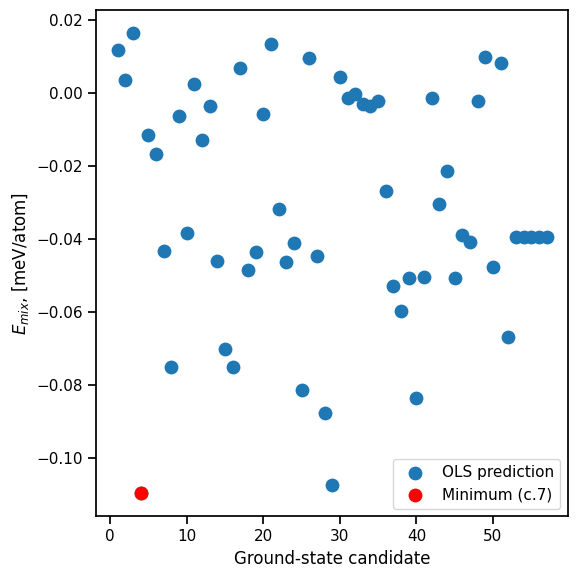

In [22]:
db_g = connect('ground-state-candidates.db')
num = 0
for row in db_g.select():
    atoms = row.toatoms()
    print(row.symbols)
    num += 1
print(num)

prim = db_g.get(1).toatoms()
cs = ClusterSpace(prim, cutoffs=[8,6,5], chemical_symbols=['Au', 'Cu'])
#atoms = db_g.get(1).toatoms()
nbr_parameters = cs.get_cluster_vector(prim).shape[0]
Xg = np.zeros((num, nbr_parameters)) # design matrix
for j, row in enumerate(db.select()):
    atoms = db_g.get(j+1).toatoms()
    x = cs.get_cluster_vector(atoms)
    Xg[j,:] = x

scaler_Xg = skpp.StandardScaler()
scaler_Xg.fit(Xg)
Xg = scaler_Xg.transform(Xg)
E_OLS = OLS.predict(Xg)
E_OLS = scaler_E.inverse_transform(E_OLS)

g_idx = np.argmin(E_OLS)
emix_min = E_OLS[g_idx]
print(emix_min)
fig, ax = plt.subplots(figsize=(6,6))
candidates = np.arange(1, num+1)
ax.scatter(candidates, E_OLS, s=80, label=r'OLS prediction')
ax.scatter(candidates[g_idx], E_OLS[g_idx], c='r', s=80, label=r'Minimum (c.7)')
ax.set_xlabel('Ground-state candidate')
ax.set_ylabel(r'$E_{mix}$, [meV/atom]')
ax.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/OLS_prediction.png')

In [23]:
# Database connection and data initialization
db_path = 'ground-state-candidates.db'
db_g = connect(db_path)
num_candidates = db_g.count()

# Display the symbols in the database
print("Symbols in the database:")
print([entry.symbols for entry in db_g.select()])

# Initialize ClusterSpace with the first atom entry
primary_atom = db_g.get_atoms(id=1)
cluster_space = ClusterSpace(primary_atom, cutoffs=[8, 6, 5], chemical_symbols=['Au', 'Cu'])
num_parameters = len(cluster_space.get_cluster_vector(primary_atom))

# Construct the design matrix
design_matrix = np.zeros((num_candidates, num_parameters))
for idx, entry in enumerate(db_g.select(), start=1):
    atom_entry = db_g.get_atoms(id=idx)
    design_matrix[idx-1, :] = cluster_space.get_cluster_vector(atom_entry)

# Scale the design matrix and predict energies
scaler = skpp.StandardScaler()
scaled_Xg = scaler.fit_transform(design_matrix)

Symbols in the database:
[['Au'], ['Cu'], ['Au', 'Cu'], ['Au', 'Cu'], ['Au', 'Au', 'Cu'], ['Au', 'Cu', 'Cu'], ['Au', 'Au', 'Cu'], ['Au', 'Cu', 'Cu'], ['Au', 'Au', 'Cu'], ['Au', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Cu'], ['Au', 'Au', 'Cu', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Cu'], ['Au', 'Au', 'Cu', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Cu'], ['Au', 'Au', 'Cu', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Cu'], ['Au', 'Au', 'Cu', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Cu'], ['Au', 'Au', 'Cu', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Au', 'Cu'], ['Au', 'Au', 'Au', 'Cu', 'Cu'], ['Au', 'Au', 'Cu', 'Au', 'Cu'], ['Au', 'Au', 'Cu', 'Cu', 'Cu'], ['Au', 'Cu', 'Au', 'Cu', 'Cu'], ['Au', 'Cu', 'Cu', 'Cu', 'Cu'], ['Au', 'Au', 'Au', 'Au', 'Cu'], ['Au', 'Au', 'Au', 'Cu', 'Cu'], ['Au', 'Au', 'Cu', 'Au', 'Cu'], ['Au', 'Au', 'Cu', 'Cu', 'Cu

Minimum Energy: [-0.10846494] (OLS)


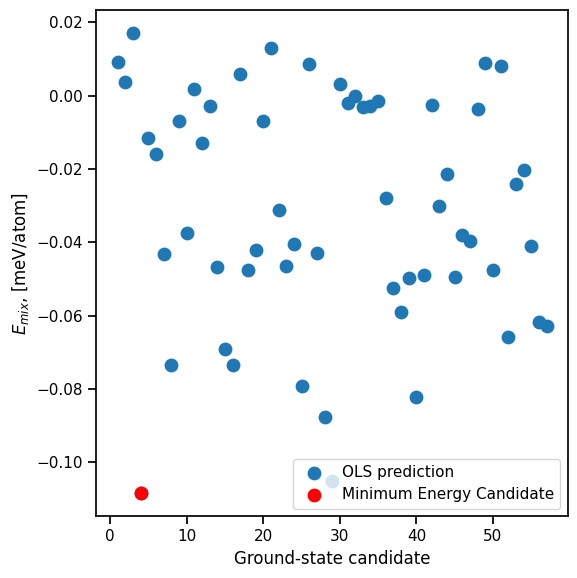

In [24]:
E_OLS = OLS.predict(scaled_Xg)
E_OLS = scaler_E.inverse_transform(E_OLS)

# Find the minimum energy and its index
minimum_energy_index = np.argmin(E_OLS)
minimum_energy = E_OLS[minimum_energy_index]
print(f"Minimum Energy: {minimum_energy} (OLS)")

# Plotting the results
plt.figure(figsize=(6, 6))
candidate_indices = np.arange(1, num_candidates + 1)
plt.scatter(candidate_indices, E_OLS, s=80, label='OLS prediction')
plt.scatter(candidate_indices[minimum_energy_index], minimum_energy, color='red', s=80, label='Minimum Energy Candidate')
plt.xlabel('Ground-state candidate')
plt.ylabel(r'$E_{mix}$, [meV/atom]')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/OLS_prediction.png')
plt.show()

In [25]:
E_Ridge = Ridge.predict(scaled_Xg)
E_Ridge = scaler_E.inverse_transform(E_Ridge)

# Find the minimum energy and its index
minimum_energy_index = np.argmin(E_Ridge)
minimum_energy = E_Ridge[minimum_energy_index]
print(f"Minimum Energy: {minimum_energy} (Ridge)")

Minimum Energy: [-0.10817474] (Ridge)


In [26]:
lambda_alpha = gamma_opt[0] * r_array + gamma_opt[1] * n_array
Lambda = np.diag(lambda_alpha)

# Train model
J = np.linalg.inv(X.T @ X + Lambda) @ X.T @ E

# Make prediction
E_phys = Xg @ J
E_phys = scaler_E.inverse_transform(E_phys)

# Find the minimum energy and its index
minimum_energy_index = np.argmin(E_phys)
minimum_energy = E_phys[minimum_energy_index]
print(f"Minimum Energy: {minimum_energy} (Phys)")

Minimum Energy: [-0.11935225] (Phys)


In [27]:
mcmc_samples = flat_mcmc_samples[10000:40000,:24]  # Your MCMC samples
ground_state_frequencies = np.zeros(57)
ground_state_energies = []

for i in range(len(mcmc_samples[:, 0])):
    energy = (Xg @ mcmc_samples[i,:]).reshape(57,1)
    index = np.argmin(energy)
    energy = scaler_E.inverse_transform(energy)
    ground_state_energies.append(energy[index])
    ground_state_frequencies[index] += 1

scalar_energies = [energy.item() for energy in ground_state_energies]
#print(scalar_energies)

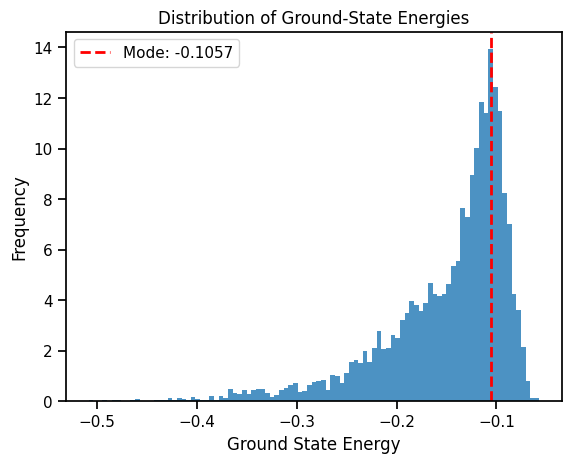

In [28]:
# Plotting the distribution of ground-state energies
hist, bins = np.histogram(scalar_energies, bins='auto', density=True)
# Find the mode
bin_centers = 0.5 * (bins[1:] + bins[:-1])
mode_index = np.argmax(hist)
mode_value = bin_centers[mode_index]

plt.hist(scalar_energies, density=True, bins=bins, alpha=0.8)
plt.xlabel("Ground State Energy")
plt.ylabel("Frequency")
plt.title("Distribution of Ground-State Energies")
plt.axvline(mode_value, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.4f}')
plt.legend()
plt.show()

In [73]:
#Connect to database and find cluster vectors
db_gs = ase.db.connect("ground-state-candidates.db")
prim_gs = db_gs.get(formula='Cu').toatoms()
#Redo for ARDR wih higher cut-off
cs_gs = icet.ClusterSpace(prim_gs, cutoffs=[13, 8, 6], chemical_symbols=['Au', 'Cu'])
#print(cs_gs)
X_gs = []
structures = []
for row in db_gs.select():
    structures.append(row.toatoms())
    X_gs.append(cs_gs.get_cluster_vector(row.toatoms()))
X_gs = np.array(X_gs)
X_gs = scaler_X_c.transform(X_gs)

E_ARD = ARD.predict(X_gs)
E_ARD = E_ARD.reshape(-1,1)
E_ARD = scaler_E.inverse_transform(E_ARD)

# Find the minimum energy and its index
minimum_energy_index = np.argmin(E_ARD)
minimum_energy = E_ARD[minimum_energy_index]
print(f"Minimum Energy: {minimum_energy} (ARD)")

Minimum Energy: [-0.11978842] (ARD)
